In [2]:
%cd ..

/Users/treycole/Codes/WanPy


In [3]:
from WanPy.WanPy import *
import WanPy.models as models
import WanPy.plotting as plot

from pythtb import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sympy as sp 
import scipy

In [4]:
delta = 1
t0 = 0.4
tprime = 0.5

model = models.chessboard(t0, tprime, delta).make_supercell([[2,0], [0,2]])

orbs = model.get_orb()
n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)
lat_vecs = model.get_lat() # lattice vectors

low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)

In [5]:
u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

print(f"Chern number: {chern:.2f}")

Chern number: -1.00


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': "$C = -1.0$ | $\\Delta = 1,\\ t_0 = 0.4,\\ t' = 0.5$"}, ylabel='Energy $E(\\mathbf{{k}})$ '>)

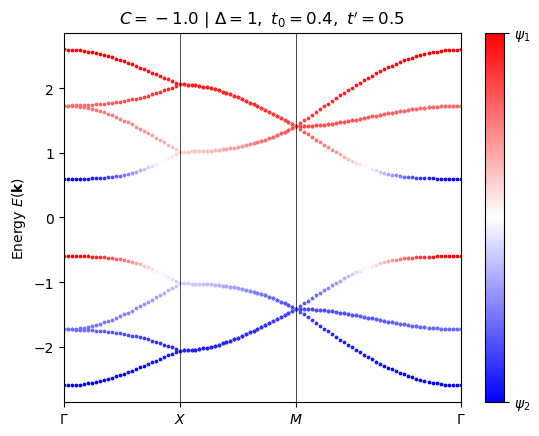

In [6]:
k_path = [[0.0, 0.0], [0.0, 0.5], [0.5, 0.5], [0.0, 0.0]]
k_label = (r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')

title = (rf"$C = {chern: .1f}$ | $\Delta = {delta},\ t_0 = {t0},\ t' = {tprime}$")

plot.plot_bands(
    model, k_path=k_path, k_label=k_label, sub_lat=True, red_lat_idx=high_E_sites, title=title)

In [7]:
# 2D k-mesh
nkx = 20
nky = 20
Nk = nkx*nky

k_mesh = gen_k_mesh(nkx, nky, flat=False, endpoint=False)
k_mesh_flat = gen_k_mesh(nkx, nky, flat=True, endpoint=False)

u_wfs_Wan = wf_array(model, [nkx, nky])

for i in range(k_mesh.shape[0]):
    for j in range(k_mesh.shape[1]):
        u_wfs_Wan.solve_on_one_point(k_mesh[i,j], [i,j])

In [8]:
omit_sites = 2
tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site

In [9]:
w0, psi_til_wan = Wannierize(orbs, u_wfs_Wan, tf_list, ret_psi_til=True)
u_tilde_wan = get_bloch_wfs(orbs, psi_til_wan, k_mesh, inverse=True)

In [28]:
M = k_overlap_mat(lat_vecs, orbs, u_tilde_wan) # [kx, ky, b, m, n]
spread, expc_r, expc_r_sq = spread_recip(lat_vecs, M, decomp=True)

print("After first projection:")
print(rf"Spread = {spread[0]}")
print(rf"Omega_I = {spread[1]}")
print(rf"Omega_til = {spread[2]}")
print("Centers:\n" f"{expc_r.round(10)}")

After first projection:
Spread = [0.27648419 0.29571951 0.27648419]
Omega_I = 0.7570854762869033
Omega_til = 0.09160242273614834
Centers:
[[-0. -0.]
 [ 1. -0.]
 [ 1.  1.]]


([<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 1 Axes>],
 [<Axes: title={'center': "$C = -1.0$ | $\\Delta = 1,\\ t_0 = 0.4,\\ t' = 0.5$\nTrial fxns on sites [0, 4, 6]"}>,
  <Axes: title={'center': "$C = -1.0$ | $\\Delta = 1,\\ t_0 = 0.4,\\ t' = 0.5$\nTrial fxns on sites [0, 4, 6]"}, xlabel='$|\\mathbf{r}|$', ylabel='$|w_0(\\mathbf{r})|^2$'>])

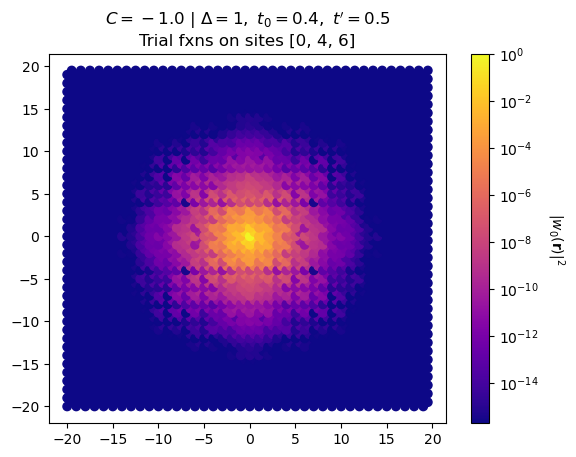

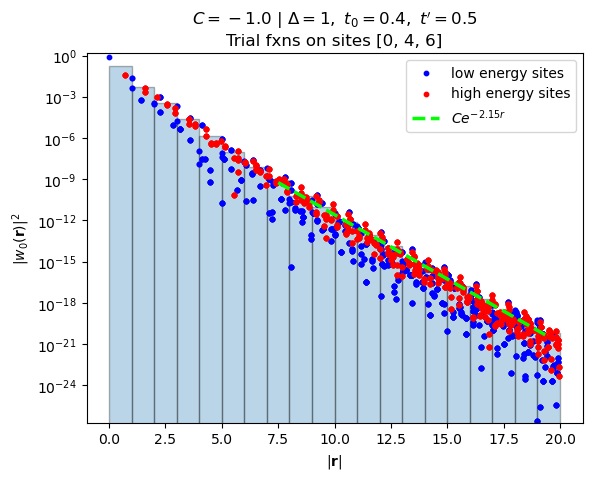

In [29]:
idx = 0
title = (rf"$C = {chern: .1f}$ | $\Delta = {delta},\ t_0 = {t0},\ t' = {tprime}$"
        "\n" 
        rf"Trial fxns on sites {tf_list}"
         )
save_name = f'w_{idx}_scatter_C={chern:.1f}_Delta={delta}_t0={t0}_tprime={tprime}_tfxs={tf_list}.png'

plot.plot_Wan(w0, idx, orbs, lat_vecs, title=title, plot_phase=False, plot_decay=True, fit_rng=[7, 20])

0 Omega_I: 0.7554307531963601
0 Omega_til = 0.09077860781455624, Grad mag: 2.8434585758297803
1 Omega_til = 0.09077008411125322, Grad mag: 2.8389376617626465
2 Omega_til = 0.09076203010218772, Grad mag: 2.834413944202937
3 Omega_til = 0.0907544107156725, Grad mag: 2.8298875696485557
4 Omega_til = 0.09074719420418616, Grad mag: 2.8253586795053587
5 Omega_til = 0.09074035175931994, Grad mag: 2.8208274105527362
6 Omega_til = 0.0907338571787437, Grad mag: 2.8162938953591303
7 Omega_til = 0.09072768657929349, Grad mag: 2.811758262653313
8 Omega_til = 0.09072181814678144, Grad mag: 2.8072206376569024
9 Omega_til = 0.09071623191851916, Grad mag: 2.8026811423826743
10 Omega_til = 0.09071090959279536, Grad mag: 2.7981398959018575
11 Omega_til = 0.09070583436157566, Grad mag: 2.7935970145842637
12 Omega_til = 0.09070099076306075, Grad mag: 2.789052612313528
13 Omega_til = 0.09069636455147702, Grad mag: 2.7845068006802167
14 Omega_til = 0.0906919425819337, Grad mag: 2.7799596891546914
15 Omega_ti

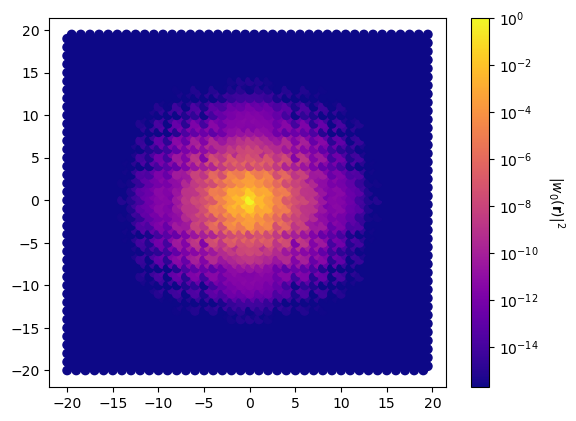

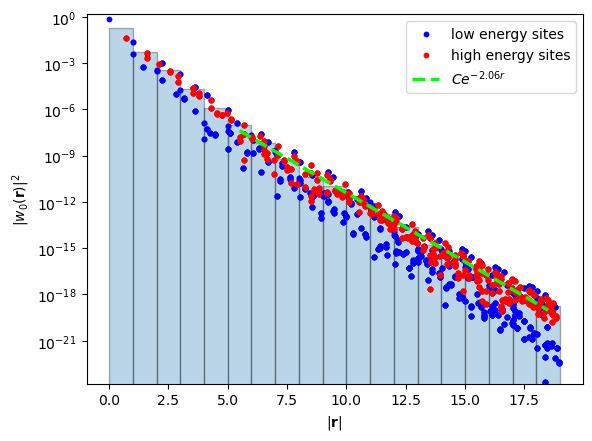

([<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 1 Axes>],
 [<Axes: >, <Axes: xlabel='$|\\mathbf{r}|$', ylabel='$|w_0(\\mathbf{r})|^2$'>])

In [13]:
# outer window of entangled bands is full occupied manifold
outer_states = u_wfs_Wan._wfs[..., :n_occ, :]
W0_max_loc, Wf_cntrs = max_loc_Wan(lat_vecs, orbs, u_wfs_Wan, tf_list, outer_states, 
        iter_num_omega_i=1, iter_num_omega_til=500,
        verbose=True, return_uwfs=False, return_wf_centers=True, eps=1e-3
        )

Wan_idx = 0
plot.plot_Wan(W0_max_loc, Wan_idx, orbs, lat_vecs, plot_decay=True, show=True)